<a href="https://colab.research.google.com/github/adnajihad/geospatial-visual/blob/main/Visualizing_Geospatial_Data_in_Python_1301170242.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt install proj-bin libproj-dev libgeos-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev libproj-dev proj-bin
0 upgraded, 3 newly installed, 0 to remove and 14 not upgraded.
Need to get 305 kB of archives.
After this operation, 1,706 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 305 kB in 0s (3,284 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144793 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Selecting previously unselected package libproj-dev:amd64.
Prepa

In [2]:
!pip install git+git://github.com/ResidentMario/geoplot.git

  Cloning git://github.com/ResidentMario/geoplot.git to /tmp/pip-req-build-i99zuo_h
  Running command git clone -q git://github.com/ResidentMario/geoplot.git /tmp/pip-req-build-i99zuo_h
     |████████████████████████████████| 972kB 9.0MB/s 
     |████████████████████████████████| 14.4MB 320kB/s 
     |████████████████████████████████| 6.5MB 50.9MB/s 
     |████████████████████████████████| 14.8MB 267kB/s 
     |████████████████████████████████| 225kB 56.0MB/s 
     |████████████████████████████████| 18.3MB 253kB/s 
  Created wheel for geoplot: filename=geoplot-0.4.1-cp36-none-any.whl size=28894 sha256=60de3684bb9257feee3729bc6014c7177e1fc87ab1cb52d01c58e20de1fafd00
  Stored in directory: /tmp/pip-ephem-wheel-cache-6py1sw8a/wheels/23/2b/70/23c7ff87a338a1067df091ca0302d247c166e294df4392b5a3
  Created wheel for cartopy: filename=Cartopy-0.18.0-cp36-cp36m-linux_x86_64.whl size=15132425 sha256=d69b1b255ff6d83e9ce04b312eca041ab5a52aa90a9636e7a610aed0b2abd3b4
  Stored in directory: /root/.cac

In [3]:
!pip install git+git://github.com/geopandas/geopandas.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-424x5s1_
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-424x5s1_
  Created wheel for geopandas: filename=geopandas-0.8.0+63.gcdb4282-py2.py3-none-any.whl size=971091 sha256=63608f2b543bbf961d886bbc920d23a8cf16a18779a5300e1096ad18ce0321d3
  Stored in directory: /tmp/pip-ephem-wheel-cache-gd6cw635/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas
  Found existing installation: geopandas 0.8.1
    Uninstalling geopandas-0.8.1:
      Successfully uninstalled geopandas-0.8.1


In [4]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

%matplotlib inline

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [5]:
!git clone https://github.com/adnajihad/geospatial-visual

Cloning into 'geospatial-visual'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [6]:
!pip install pyunpack
!pip install patool

from pyunpack import Archive

Archive('/content/geospatial-visual/cb_2018_us_state_20m.zip').extractall('/content')

     |████████████████████████████████| 81kB 5.3MB/s 


In [7]:
usa = gpd.read_file("/content/cb_2018_us_state_20m.shp")
usa.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


In [8]:
state_pop = pd.read_csv("/content/geospatial-visual/nst-est2018-alldata.csv")
state_pop.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,NPOPCHG_2016,NPOPCHG_2017,NPOPCHG_2018,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,BIRTHS2016,BIRTHS2017,BIRTHS2018,DEATHS2010,DEATHS2011,DEATHS2012,DEATHS2013,DEATHS2014,DEATHS2015,DEATHS2016,DEATHS2017,DEATHS2018,NATURALINC2010,NATURALINC2011,NATURALINC2012,NATURALINC2013,NATURALINC2014,NATURALINC2015,NATURALINC2016,NATURALINC2017,NATURALINC2018,INTERNATIONALMIG2010,INTERNATIONALMIG2011,INTERNATIONALMIG2012,INTERNATIONALMIG2013,INTERNATIONALMIG2014,INTERNATIONALMIG2015,INTERNATIONALMIG2016,INTERNATIONALMIG2017,INTERNATIONALMIG2018,DOMESTICMIG2010,DOMESTICMIG2011,DOMESTICMIG2012,DOMESTICMIG2013,DOMESTICMIG2014,DOMESTICMIG2015,DOMESTICMIG2016,DOMESTICMIG2017,DOMESTICMIG2018,NETMIG2010,NETMIG2011,NETMIG2012,NETMIG2013,NETMIG2014,NETMIG2015,NETMIG2016,NETMIG2017,NETMIG2018,RESIDUAL2010,RESIDUAL2011,RESIDUAL2012,RESIDUAL2013,RESIDUAL2014,RESIDUAL2015,RESIDUAL2016,RESIDUAL2017,RESIDUAL2018,RBIRTH2011,RBIRTH2012,RBIRTH2013,RBIRTH2014,RBIRTH2015,RBIRTH2016,RBIRTH2017,RBIRTH2018,RDEATH2011,RDEATH2012,RDEATH2013,RDEATH2014,RDEATH2015,RDEATH2016,RDEATH2017,RDEATH2018,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RNATURALINC2016,RNATURALINC2017,RNATURALINC2018,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RINTERNATIONALMIG2016,RINTERNATIONALMIG2017,RINTERNATIONALMIG2018,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RDOMESTICMIG2016,RDOMESTICMIG2017,RDOMESTICMIG2018,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018
0,10,0,0,0,United States,308745538,308758105,309326085,311580009,313874218,316057727,318386421,320742673,323071342,325147121,327167434,567980,2253924,2294209,2183509,2328694,2356252,2328669,2075779,2020313,987836,3973485,3936976,3940576,3963195,3992376,3962654,3901982,3855500,598691,2512442,2501531,2608019,2582448,2699826,2703215,2779436,2814013,389145,1461043,1435445,1332557,1380747,1292550,1259439,1122546,1041487,178835,792881,858764,850952,947947,1063702,1069230,953233,978826,0,0,0,0,0,0,0,0,0,178835,792881,858764,850952,947947,1063702,1069230,953233,978826,0,0,0,0,0,0,0,0,0,12.798989,12.589174,12.511117,12.493440,12.493176,12.309934,12.039096,11.820984,8.092824,7.999086,8.280320,8.140821,8.448453,8.397503,8.575615,8.627779,4.706164,4.590088,4.230797,4.352620,4.044723,3.912431,3.463480,3.193205,2.553948,2.746049,2.701727,2.988276,3.328598,3.321549,2.941086,3.001086,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.553948,2.746049,2.701727,2.988276,3.328598,3.321549,2.941086,3.001086
1,20,1,0,0,Northeast Region,55317240,55318430,55380645,55600532,55776729,55907823,56015864,56047587,56058789,56072676,56111079,62215,219887,176197,131094,108041,31723,11202,13887,38403,163454,646265,637904,635741,632433,634515,628039,616552,609336,110848,470816,460985,480032,470196,488881,480331,501022,506909,52606,175449,176919,155709,162237,145634,147708,115530,102427,45723,206686,207584,194103,222685,227275,236718,215872,229700,-32918,-159789,-205314,-216273,-274391,-339996,-372953,-316879,-292928,12805,46897,2270,-22170,-51706,-112721,-136235,-101007,-63228,-3196,-2459,-2992,-2445,-2490,-1190,-271,-636,-796,11.646389,11.454834,11.384583,11.301147,11.324210,11.204340,10.996949,10.863177,8.484610,8.277902,8.596211,8.402082,8.725075,8.569200,8.936332,9.037120,3.161779,3.176932,2.788371,2.899065,2.599135,2.635140,2.060617,1.826058,3.724704,3.727583,3.475915,3.979229,4.056184,4.223096,3.850338,4.095067,-2.879569,-3.686821,-3.872926,-4.903180,-6.067920,-6.653556,-5.651919,-5.222289,0.845134,0.040762,-0.397011,-0.923951,-2.011735,-2.430459,

In [9]:
pop_states = usa.merge(state_pop, left_on="NAME", right_on="NAME")
pop_states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,SUMLEV,REGION,DIVISION,STATE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,NPOPCHG_2016,NPOPCHG_2017,NPOPCHG_2018,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,BIRTHS2016,BIRTHS2017,BIRTHS2018,DEATHS2010,DEATHS2011,DEATHS2012,DEATHS2013,DEATHS2014,DEATHS2015,DEATHS2016,DEATHS2017,DEATHS2018,NATURALINC2010,NATURALINC2011,NATURALINC2012,NATURALINC2013,NATURALINC2014,NATURALINC2015,NATURALINC2016,NATURALINC2017,NATURALINC2018,INTERNATIONALMIG2010,INTERNATIONALMIG2011,INTERNATIONALMIG2012,INTERNATIONALMIG2013,INTERNATIONALMIG2014,INTERNATIONALMIG2015,INTERNATIONALMIG2016,INTERNATIONALMIG2017,INTERNATIONALMIG2018,DOMESTICMIG2010,DOMESTICMIG2011,DOMESTICMIG2012,DOMESTICMIG2013,DOMESTICMIG2014,DOMESTICMIG2015,DOMESTICMIG2016,DOMESTICMIG2017,DOMESTICMIG2018,NETMIG2010,NETMIG2011,NETMIG2012,NETMIG2013,NETMIG2014,NETMIG2015,NETMIG2016,NETMIG2017,NETMIG2018,RESIDUAL2010,RESIDUAL2011,RESIDUAL2012,RESIDUAL2013,RESIDUAL2014,RESIDUAL2015,RESIDUAL2016,RESIDUAL2017,RESIDUAL2018,RBIRTH2011,RBIRTH2012,RBIRTH2013,RBIRTH2014,RBIRTH2015,RBIRTH2016,RBIRTH2017,RBIRTH2018,RDEATH2011,RDEATH2012,RDEATH2013,RDEATH2014,RDEATH2015,RDEATH2016,RDEATH2017,RDEATH2018,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RNATURALINC2016,RNATURALINC2017,RNATURALINC2018,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RINTERNATIONALMIG2016,RINTERNATIONALMIG2017,RINTERNATIONALMIG2018,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RDOMESTICMIG2016,RDOMESTICMIG2017,RDOMESTICMIG2018,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...",40,3,5,24,5773552,5773798,5788642,5838991,5887072,5923704,5958165,5986717,6004692,6024891,6042718,14844,50349,48081,36632,34461,28552,17975,20199,17827,18454,73542,72720,72362,72756,74158,73387,72138,71029,10628,43674,43461,45736,44735,47160,47239,50555,51184,7826,29868,29259,26626,28021,26998,26148,21583,19845,6590,20726,25760,21406,23397,27566,21569,22756,22575,841,208,-6323,-10919,-16504,-25680,-29676,-24011,-24518,7431,20934,19437,10487,6893,1886,-8107,-1255,-1943,-413,-453,-615,-481,-453,-332,-66,-129,-75,12.649522,12.403140,12.253556,12.246558,12.416699,12.239929,11.993433,11.771843,7.512105,7.412718,7.744792,7.529960,7.896269,7.878807,8.405113,8.482873,5.137417,4.990422,4.508764,4.716598,4.520430,4.361122,3.588321,3.288970,3.564956,4.393632,3.624825,3.938269,4.615533,3.597409,3.783340,3.741421,0.035777,-1.078452,-1.848989,-2.778014,-4.299749,-4.949543,-3.991992,-4.063440,3.600733,3.315179,1.775836,1.160255,0.315784,-1.352135,-0.208652,-0.322019
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827...",40,2,4,19,3046355,3046872,3050767,3066054,3076097,3093078,3109504,3121460,3131785,3143637,3156145,3895,15287,10043,16981,16426,11956,10325,11852,12508,9966,37852,38478,38805,39460,39694,39428,38892,38417,6871,28210,28048,29139,28925,29808,29189,28817,28803,3095,9642,10430,9666,10535,9886,10239,10075,9614,1454,6180,4068,6973,6862,5492,5622,5809,5828,-553,-541,-4438,306,-891,-3304,-5508,-4010,-2886,901,5639,-370,7279,5971,2188,114,1799,2942,-101,6,-17,36,-80,-118,-28,-22,-48,12.376363,12.529161,12.580288,12.723733,12.740886,12.610413,12.395023,12.196295,9.223745,9.132957,9.446644,9.326761,9.567701,9.335633,9.184084,9.144126,3.152618,3.396204,3.133644,3.396972,3.173185,3.274780,3.210939,3.052169,2.020657,1.324617,2.260594,2.212627,1.762809,1.798106,1.851350,1.850223,-0.176889,-1.445096,0.099203,-0.287300

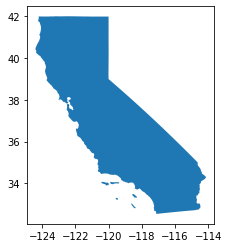

In [10]:
pop_states[pop_states.NAME=="California"].plot()

In [11]:
path = gplt.datasets.get_path("contiguous_usa")
contiguous_usa = gpd.read_file(path)
contiguous_usa.head()

,state,adm1_code,population,geometry
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0..."
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1..."


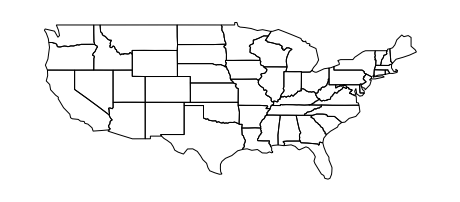

In [12]:
gplt.polyplot(contiguous_usa)

In [13]:
path = gplt.datasets.get_path("usa_cities")
usa_cities = gpd.read_file(path)
usa_cities.head()

,id,POP_2010,ELEV_IN_FT,STATE,geometry
0,53,40888.0,1611.0,ND,POINT (-101.29627 48.23251)
1,101,52838.0,830.0,ND,POINT (-97.03285 47.92526)
2,153,15427.0,1407.0,ND,POINT (-98.70844 46.91054)
3,177,105549.0,902.0,ND,POINT (-96.78980 46.87719)
4,192,17787.0,2411.0,ND,POINT (-102.78962 46.87918)


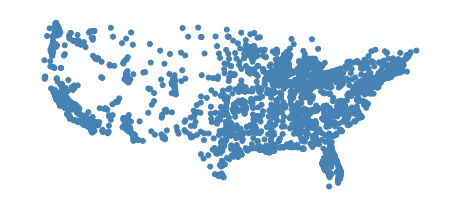

In [14]:
continental_usa_cities = usa_cities.query('STATE not in ["HI", "AK", "PR"]')
gplt.pointplot(continental_usa_cities)

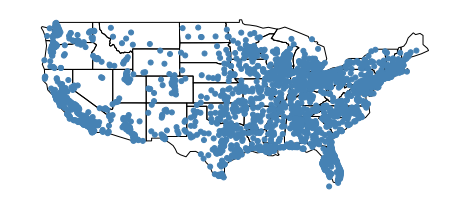

In [15]:
ax = gplt.polyplot(contiguous_usa)
gplt.pointplot(continental_usa_cities, ax=ax)

# Representing Data

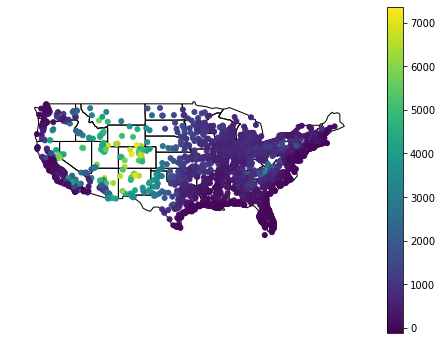

In [17]:
ax = gplt.polyplot(contiguous_usa)

gplt.pointplot(
    continental_usa_cities,
    ax=ax,
    hue="ELEV_IN_FT",
    legend=True
)

Text(0.5, 1.0, 'Cities in the continental US, by elevation')

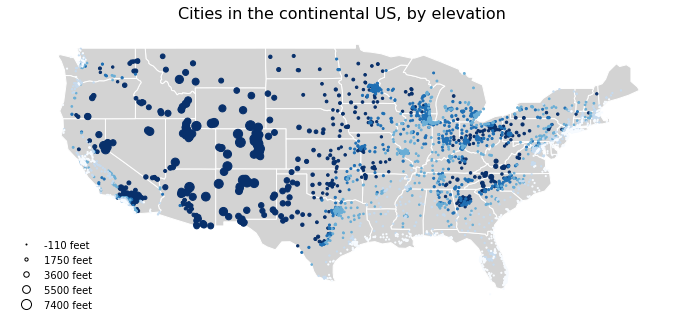

In [18]:
ax = gplt.polyplot(
    contiguous_usa, 
    edgecolor="white",
    facecolor="lightgray",
    figsize=(12, 8)
)

gplt.pointplot(
    continental_usa_cities,
    ax=ax,
    hue="ELEV_IN_FT",
    cmap="Blues",
    scheme="quantiles",
    scale="ELEV_IN_FT",
    limits=(1, 10),
    legend=True,
    legend_var="scale",
    legend_kwargs={"frameon": False},
    legend_values=[-110, 1750, 3600, 5500, 7400],
    legend_labels=["-110 feet", "1750 feet", "3600 feet", "5500 feet", "7400 feet"]
)

ax.set_title("Cities in the continental US, by elevation", fontsize=16)

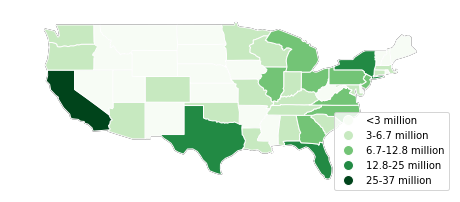

In [19]:
ax = gplt.polyplot(contiguous_usa)

gplt.choropleth(
    contiguous_usa,
    hue="population",
    edgecolor="white",
    linewidth=1,
    cmap="Greens",
    legend=True,
    scheme="FisherJenks",
    legend_labels=[
        "<3 million", "3-6.7 million", "6.7-12.8 million",
        "12.8-25 million", "25-37 million"
    ],
    ax=ax
)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


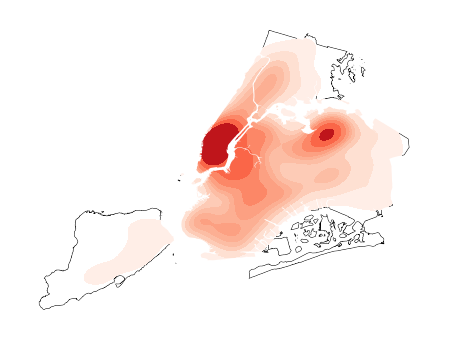

In [20]:
boroughs = gpd.read_file(gplt.datasets.get_path("nyc_boroughs"))
collisions = gpd.read_file(gplt.datasets.get_path("nyc_collision_factors"))

ax = gplt.polyplot(boroughs)
gplt.kdeplot(collisions, cmap="Reds", shade=True, clip=boroughs, ax=ax)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


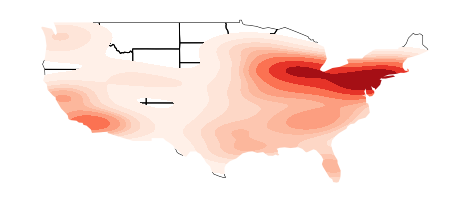

In [21]:
ax = gplt.polyplot(contiguous_usa)

gplt.kdeplot(
    continental_usa_cities, 
    cmap="Reds", 
    shade=True, 
    clip=contiguous_usa, 
    ax=ax
)

In [22]:
obesity = pd.read_csv(gplt.datasets.get_path("obesity_by_state"), sep="\t")
obesity.head()

,State,Percent
0,Alabama,32.4
1,Missouri,30.4
2,Alaska,28.4
3,Montana,24.6
4,Arizona,26.8


In [23]:
geo_obesity = contiguous_usa.set_index("state").join(obesity.set_index("State"))
geo_obesity.head()

,adm1_code,population,geometry,Percent
state,,,,
Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",25.5
Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7...",24.6
North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199...",31.0
Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0...",29.6
Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1...",27.2


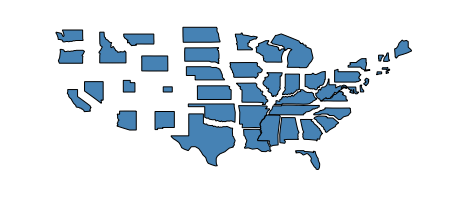

In [24]:
gplt.cartogram(
    geo_obesity,
    scale="Percent"
)

In [25]:
scheme = mc.Quantiles(continental_usa_cities["ELEV_IN_FT"], k=10)
scheme

Quantiles                 

     Interval        Count
--------------------------
[-112.00,   26.00] |   382
(  26.00,   72.00] |   351
(  72.00,  157.00] |   362
( 157.00,  328.00] |   353
( 328.00,  528.00] |   366
( 528.00,  646.00] |   359
( 646.00,  778.00] |   359
( 778.00,  948.00] |   363
( 948.00, 1310.50] |   359
(1310.50, 7369.00] |   362

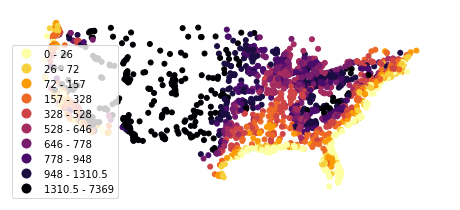

In [26]:
gplt.pointplot(
    continental_usa_cities,
    hue="ELEV_IN_FT",
    scheme=scheme,
    cmap="inferno_r",
    legend=True
)

In [27]:
import warnings

warnings.filterwarnings("ignore", "GeoSeries.isna", UserWarning)

/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:1108: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


Text(0.5, 1.0, 'Primary Schools in Greater Melbourne, 2018')

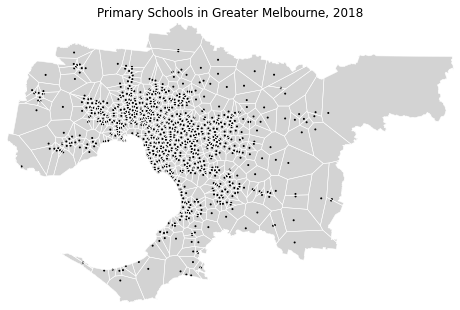

In [28]:
melbourne = gpd.read_file(gplt.datasets.get_path("melbourne"))
df = gpd.read_file(gplt.datasets.get_path("melbourne_schools"))
melbourne_primary_schools = df.query('School_Type == "Primary"')

ax = gplt.voronoi(
    melbourne_primary_schools,
    clip=melbourne,
    linewidth=0.5,
    edgecolor="white"
    
)

gplt.polyplot(
    melbourne, 
    edgecolor="None", 
    facecolor="lightgray",
    ax=ax
)

gplt.pointplot(
    melbourne_primary_schools,
    color="black",
    ax=ax,
    s=1,
    extent=melbourne.total_bounds
)

plt.title("Primary Schools in Greater Melbourne, 2018")

ValueError: ignored

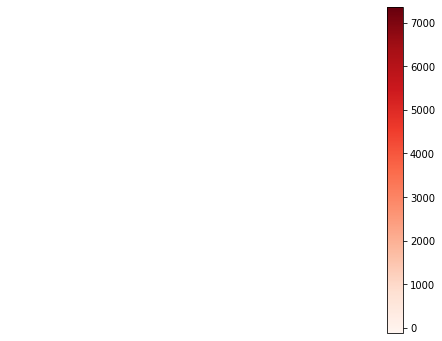

In [45]:
# proj = gplt.crs(central_longitude=-98, central_latitude=39.5)

ax = gplt.voronoi(
    continental_usa_cities,
    hue="ELEV_IN_FT",
    clip=contiguous_usa,
    # projection=proj,
    cmap="Reds",
    legend=True
    # edgecolor="white",
    # linewidth=0.01
)

gplt.polyplot(
    contiguous_usa,
    ax=ax,
    extent=contiguous_usa.total_bounds,
    edgecolor="black",
    linewidth=1,
    zorder=1
)

# Visualizing COVID-19 Data

In [46]:
ihme = pd.read_csv("reference_hospitalization_all_locs.csv", error_bad_lines=False, engine='python')
ihme.head()

,location_id,date,V1,location_name,allbed_mean,allbed_lower,allbed_upper,ICUbed_mean,ICUbed_lower,ICUbed_upper,InvVen_mean,InvVen_lower,InvVen_upper,admis_mean,admis_lower,admis_upper,newICU_mean,newICU_lower,newICU_upper,bedover_mean,bedover_lower,bedover_upper,icuover_mean,icuover_lower,icuover_upper,hosp_data_type,deaths_data_type,deaths_mean,deaths_lower,deaths_upper,totdea_mean,totdea_lower,totdea_upper,deaths_mean_smoothed,deaths_lower_smoothed,deaths_upper_smoothed,totdea_mean_smoothed,totdea_lower_smoothed,totdea_upper_smoothed,mobility_data_type,mobility_composite,total_tests_data_type,total_tests,confirmed_infections_data_type,confirmed_infections,est_infections_data_type,est_infections_mean,est_infections_lower,est_infections_upper,total_pop,deaths_mean_p100k_rate,deaths_lower_p100k_rate,deaths_upper_p100k_rate,totdea_mean_p100k_rate,totdea_lower_p100k_rate,totdea_upper_p100k_rate,deaths_mean_smoothed_p100k_rate,deaths_lower_smoothed_p100k_rate,deaths_upper_smoothed_p100k_rate,totdea_mean_smoothed_p100k_rate,totdea_lower_smoothed_p100k_rate,totdea_upper_smoothed_p100k_rate,confirmed_infections_p100k_rate,est_infections_mean_p100k_rate,est_infections_lower_p100k_rate,est_infections_upper_p100k_rate,inf_cuml_mean,inf_cuml_upper,inf_cuml_lower,seroprev_mean,seroprev_upper,seroprev_lower,seroprev_data_type
0,1,2020-02-04,48609,Global,14282.965745,14282.965745,14282.965745,5827.528414,5827.528414,5827.528414,2805.837836,2805.837836,2805.837836,748.254180,748.254180,748.254180,245.603092,245.603092,245.603092,14282.965745,14282.965745,14282.965745,5827.528414,5827.528414,5827.528414,observed,observed,103.0,103.0,103.0,798.0,798.0,798.0,124.926956,124.926956,124.926956,716.349379,716.349379,716.349379,NaN,NaN,observed,241.653487,observed,4966.0,projected,19902.994791,16739.591236,23818.103526,7.737465e+09,0.001331,0.001331,0.001331,0.010313,0.010313,0.010313,0.001615,0.001615,0.001615,0.009258,0.009258,0.009258,0.064181,0.257229,0.216345,0.307828,19902.994791,23818.103526,16739.591236,0.000033,0.000044,0.000025,projected
1,1,2020-02-05,48610,Global,15571.172555,15571.172555,15571.172555,6217.948134,6217.948134,6217.948134,2987.086455,2987.086455,2987.086455,754.590903,754.590903,754.590903,251.211976,251.211976,251.211976,15571.172555,15571.172555,15571.172555,6217.948134,6217.948134,6217.948134,observed,observed,111.0,111.0,111.0,909.0,909.0,909.0,136.063126,136.063126,136.063126,852.412505,852.412505,852.412505,NaN,NaN,observed,263.352258,observed,4749.0,projected,19244.832336,16222.292589,22922.059385,7.737465e+09,0.001435,0.001435,0.001435,0.011748,0.011748,0.011748,0.001758,0.001758,0.001758,0.011017,0.011017,0.011017,0.061377,0.248723,0.209659,0.296248,39147.827127,46740.162911,32961.883825,0.000037,0.000047,0.000028,projected
2,1,2020-02-06,48611,Global,16762.153085,16762.153085,16762.153085,6559.103608,6559.103608,6559.103608,3143.981084,3143.981084,3143.981084,753.218924,753.218924,753.218924,253.957074,253.957074,253.957074,16762.153085,16762.153085,16762.153085,6559.103608,6559.103608,6559.103608,observed,observed,110.0,110.0,110.0,1019.0,1019.0,1019.0,145.351476,145.351476,145.351476,997.763981,997.763981,997.763981,NaN,NaN,observed,285.273154,observed,3921.0,projected,18607.437230,15716.179969,22049.696627,7.737465e+09,0.001422,0.001422,0.001422,0.013170,0.013170,0.013170,0.001879,0.001879,0.001879,0.012895,0.012895,0.012895,0.050676,0.240485,0.203118,0.284973,57755.264357,68789.859538,48678.063794,0.000040,0.000051,0.000031,projected
3,1,2020-02-07,48612,Global,17837.855078,17837.855078,17837.855078,6845.497859,6845.497859,6845.497859,3274.053573,3274.053573,3274.053573,745.463158,745.463158,745.463158,254.152061,254.152061,254.152061,17837.855078,17837.855078,17837.855078,6845.497859,6845.497859,6845.497859,observed,observed,130.0,130.0,130.0,1149.0,1149.0,1149.0,152.635224,152.635224,152.635224,1150.399205,1150.399205,1150.399205,NaN,NaN,observed,307.627385,observed,4495.0,projected,18017.615317,15222.83527

In [47]:
is_earthday = ihme["date"]=="2020-04-22"
is_earthday.head()

0    False
1    False
2    False
3    False
4    False
Name: date, dtype: bool

In [48]:
cv19 = contiguous_usa.merge(ihme[is_earthday], left_on="state", right_on="location_name")
cv19.head()

,state,adm1_code,population,geometry,location_id,date,V1,location_name,allbed_mean,allbed_lower,allbed_upper,ICUbed_mean,ICUbed_lower,ICUbed_upper,InvVen_mean,InvVen_lower,InvVen_upper,admis_mean,admis_lower,admis_upper,newICU_mean,newICU_lower,newICU_upper,bedover_mean,bedover_lower,bedover_upper,icuover_mean,icuover_lower,icuover_upper,hosp_data_type,deaths_data_type,deaths_mean,deaths_lower,deaths_upper,totdea_mean,totdea_lower,totdea_upper,deaths_mean_smoothed,deaths_lower_smoothed,deaths_upper_smoothed,totdea_mean_smoothed,totdea_lower_smoothed,totdea_upper_smoothed,mobility_data_type,mobility_composite,total_tests_data_type,total_tests,confirmed_infections_data_type,confirmed_infections,est_infections_data_type,est_infections_mean,est_infections_lower,est_infections_upper,total_pop,deaths_mean_p100k_rate,deaths_lower_p100k_rate,deaths_upper_p100k_rate,totdea_mean_p100k_rate,totdea_lower_p100k_rate,totdea_upper_p100k_rate,deaths_mean_smoothed_p100k_rate,deaths_lower_smoothed_p100k_rate,deaths_upper_smoothed_p100k_rate,totdea_mean_smoothed_p100k_rate,totdea_lower_smoothed_p100k_rate,totdea_upper_smoothed_p100k_rate,confirmed_infections_p100k_rate,est_infections_mean_p100k_rate,est_infections_lower_p100k_rate,est_infections_upper_p100k_rate,inf_cuml_mean,inf_cuml_upper,inf_cuml_lower,seroprev_mean,seroprev_upper,seroprev_lower,seroprev_data_type
0,Georgia,USA-3543,9687653,"POLYGON ((-80.86501 32.03316, -81.33629 31.440...",35,2020-04-22,46805,Georgia,30.610021,30.610021,30.610021,4.594655,4.594655,4.594655,2.73452,2.73452,2.73452,1.314577,1.314577,1.314577,0.431422,0.431422,0.431422,0.0,0.0,0.0,0.0,0.0,0.0,observed,observed,1.0,1.0,1.0,5.0,5.0,5.0,0.228667,0.228667,0.228667,4.944504,4.944504,4.944504,observed,-71.672098,observed,5.890447,observed,8.0,projected,35.333589,24.327232,48.455037,3.664752e+06,0.027287,0.027287,0.027287,0.136435,0.136435,0.136435,0.00624,0.00624,0.00624,0.134921,0.134921,0.134921,0.218296,0.964147,0.663817,1.322191,1453.936959,1844.823851,1123.489825,0.000246,0.000296,0.0002,projected


In [49]:
deaths_per_mil = cv19["deaths_mean"] / cv19["population"] * 1000000.0
cv19["deaths_per_mil"] = deaths_per_mil

Text(0.5, 1.0, 'COVID-19 deaths/million vs. population, on Earth Day 2020')

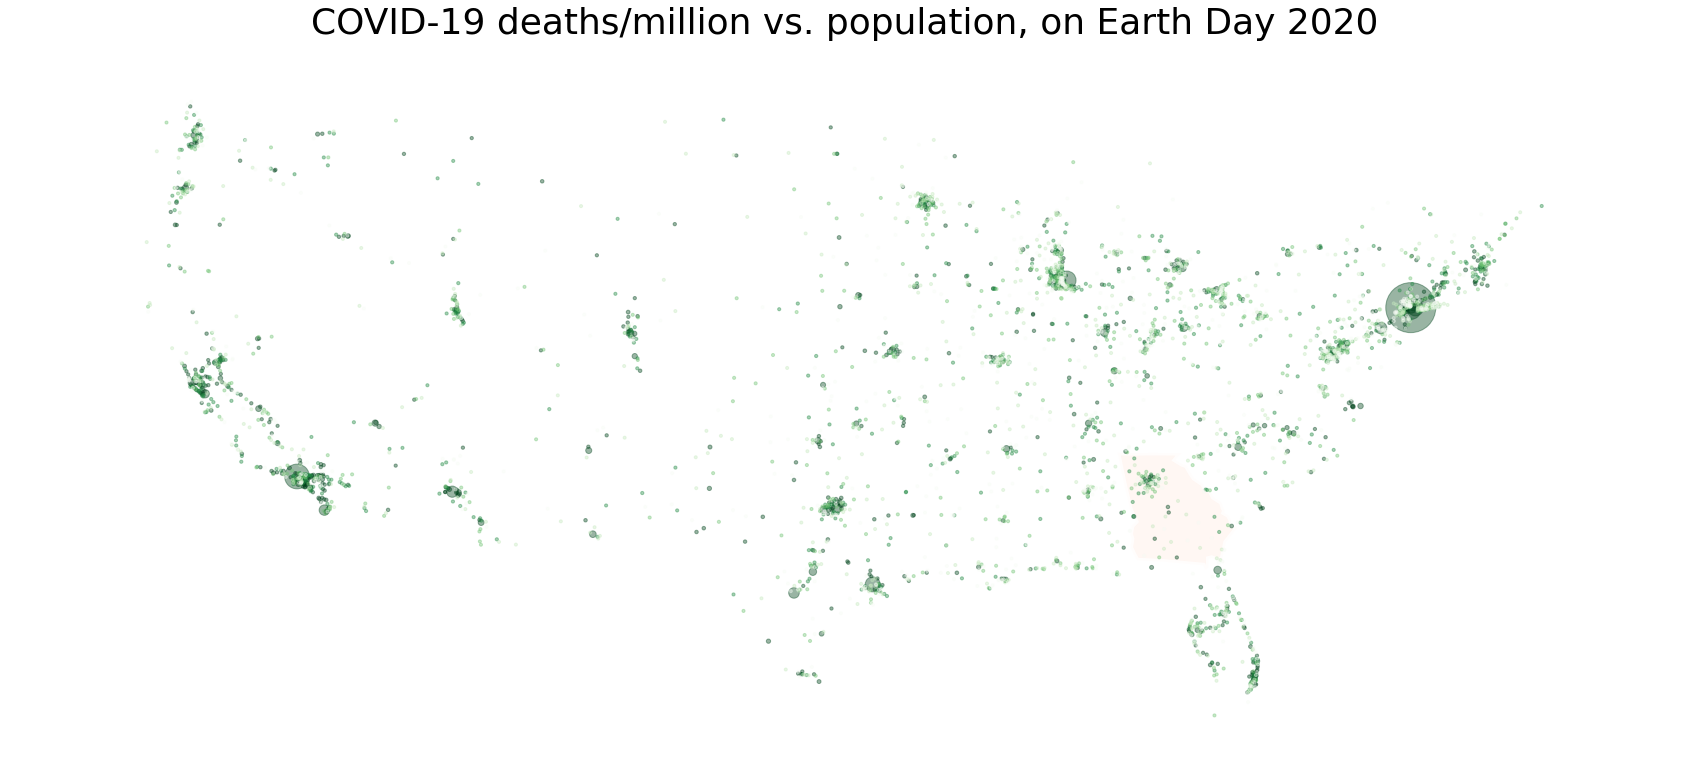

In [50]:
ax = gplt.choropleth(
    cv19,
    hue="deaths_per_mil",
    edgecolor="white",
    linewidth=5,
    cmap="Reds",
    alpha = 0.8,
    figsize=(30, 30)
)

ax = gplt.pointplot(
    continental_usa_cities,
    hue="POP_2010",
    cmap="Greens",
    scheme="quantiles",
    scale="POP_2010",
    limits=(3, 50),
    zorder=2, 
    alpha = 0.4,
    ax=ax
)

ax.set_title(
    "COVID-19 deaths/million vs. population, on Earth Day 2020",
    fontsize=36
)

In [51]:
def plot_choropleth (anim_path, date, cv19, cities):
    ax = gplt.choropleth(
        cv19,
        hue="deaths_per_mil",
        edgecolor="white",
        linewidth=5,
        cmap="Reds",
        alpha = 0.8,
        figsize=(30, 30)
    )
    
    ax = gplt.pointplot(
        cities,
        hue="POP_2010",
        cmap="Greens",
        scheme="quantiles",
        scale="POP_2010",
        limits=(3, 50),
        zorder=2, 
        alpha = 0.4,
        ax=ax
    )

    ax.set_title(
        f"COVID-19 deaths/million vs. population on {date}",
        fontsize=36
    )

    file_name = str(anim_path / "{}.png".format(date.replace("-", "")))
    plt.savefig(file_name, bbox_inches="tight", pad_inches=0.1)

    return file_name

In [52]:
date_set = set([])

for d in ihme["date"].tolist():
    if d >= "2020-03-23" and d <= "2020-04-01":
        date_set.add(d)

dates = sorted(list(date_set))

<Figure size 432x288 with 0 Axes>

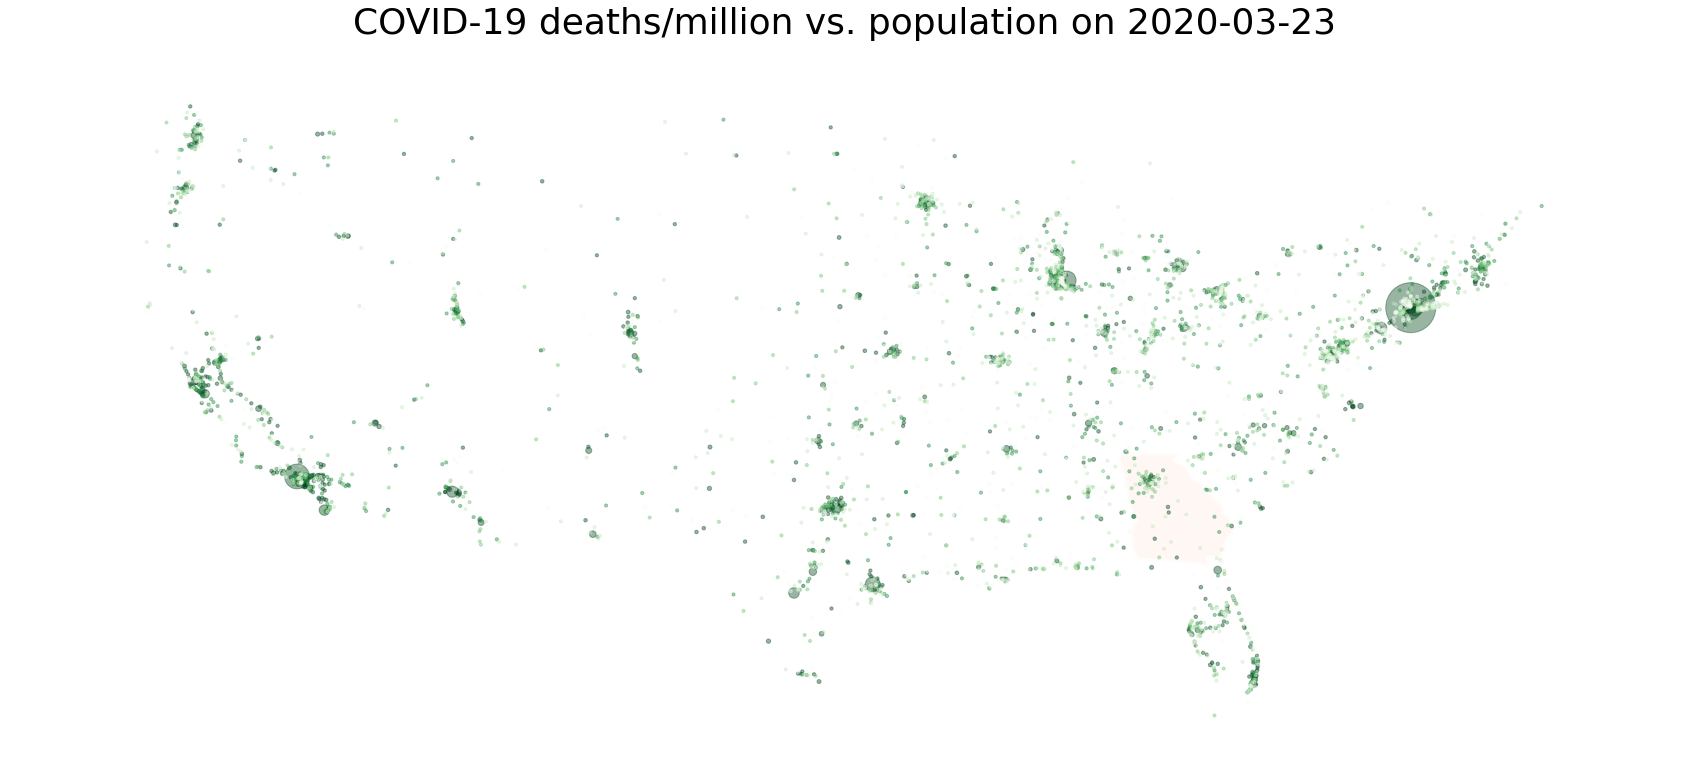

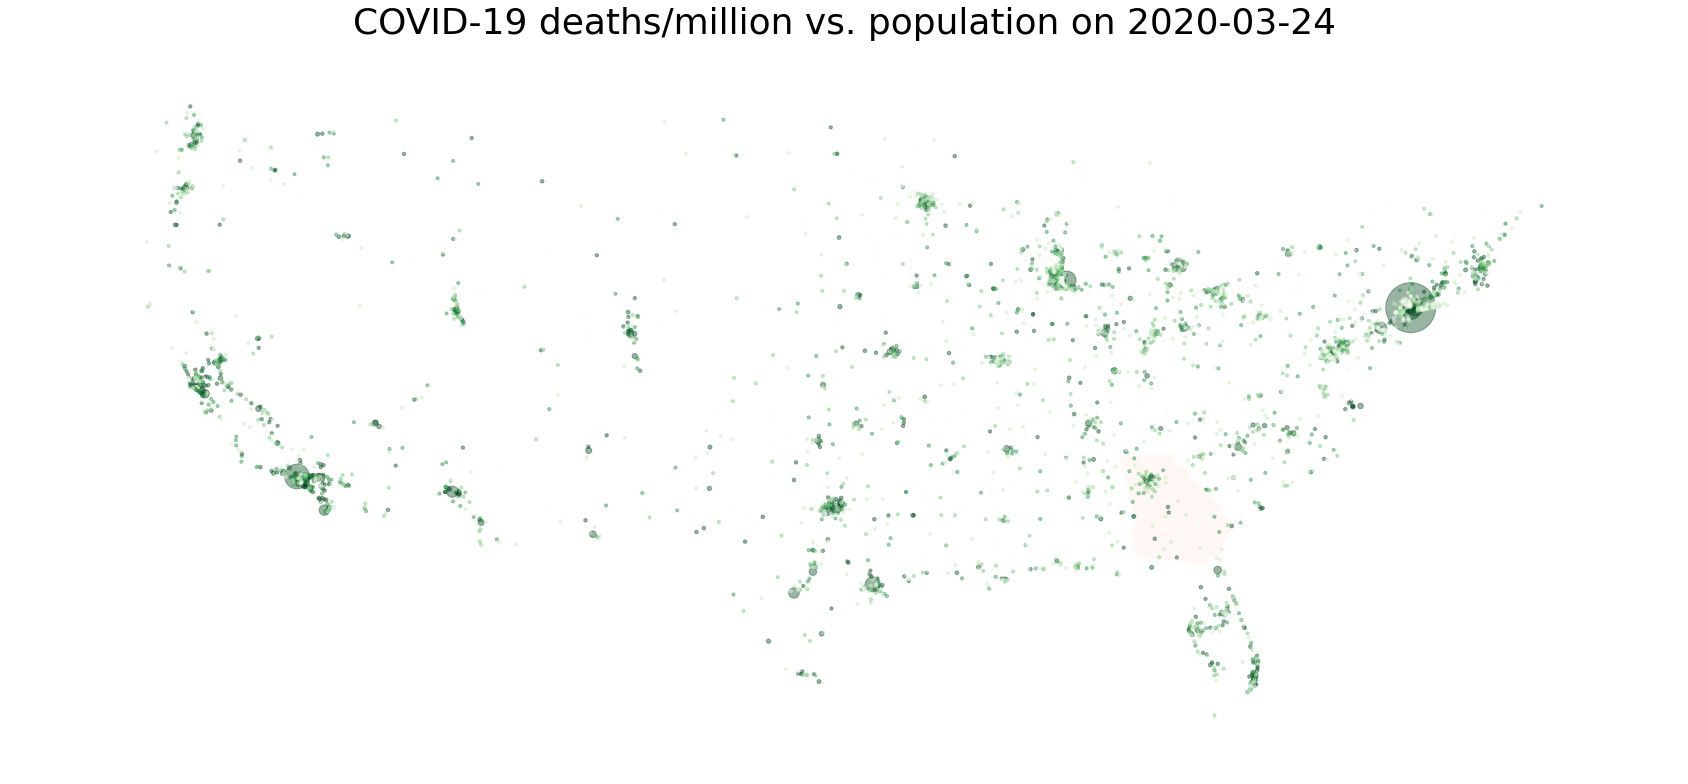

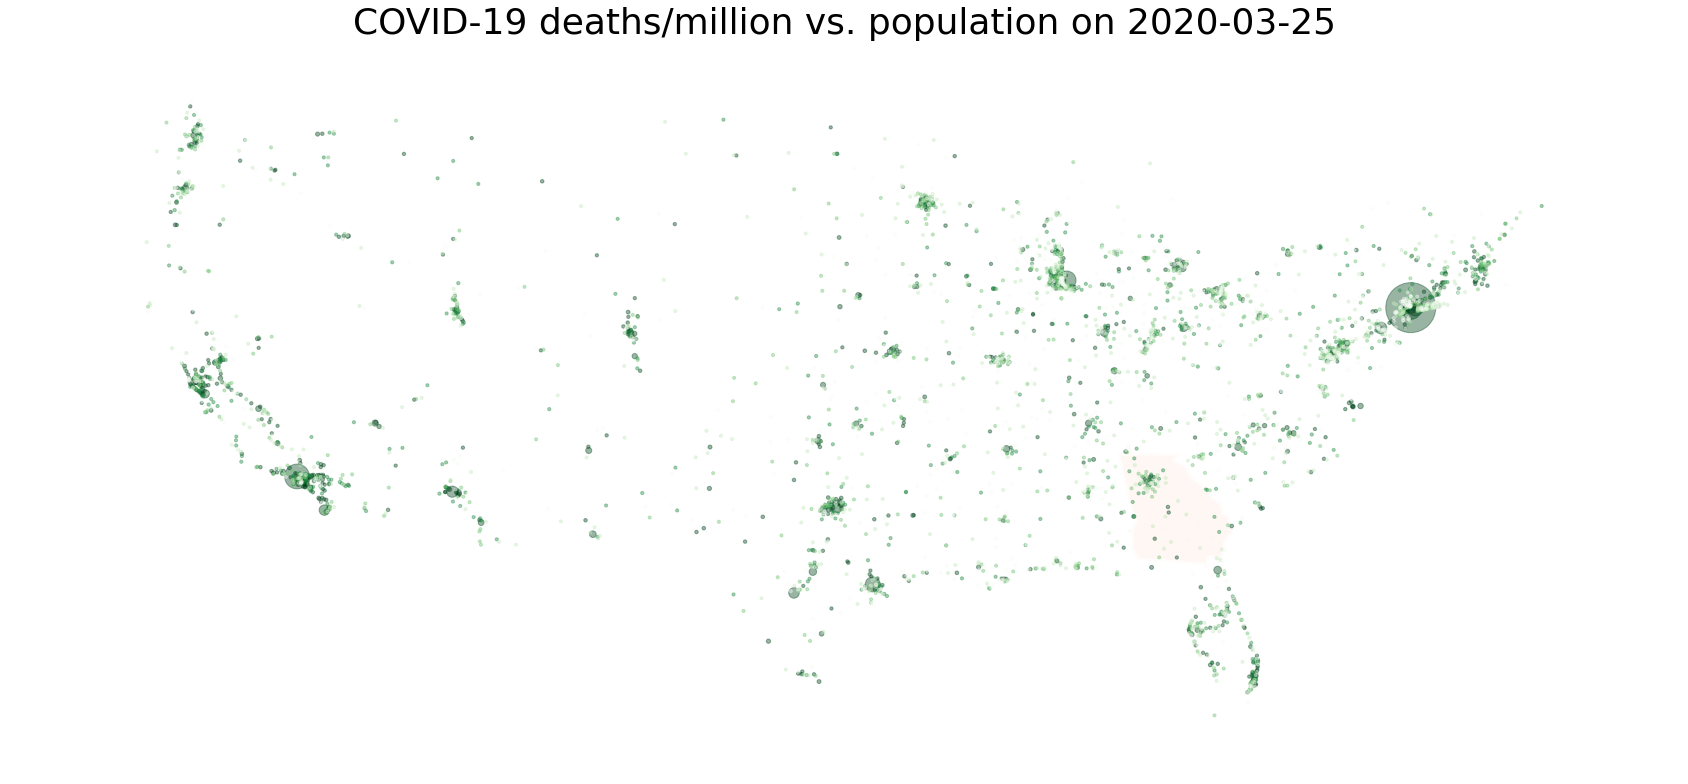

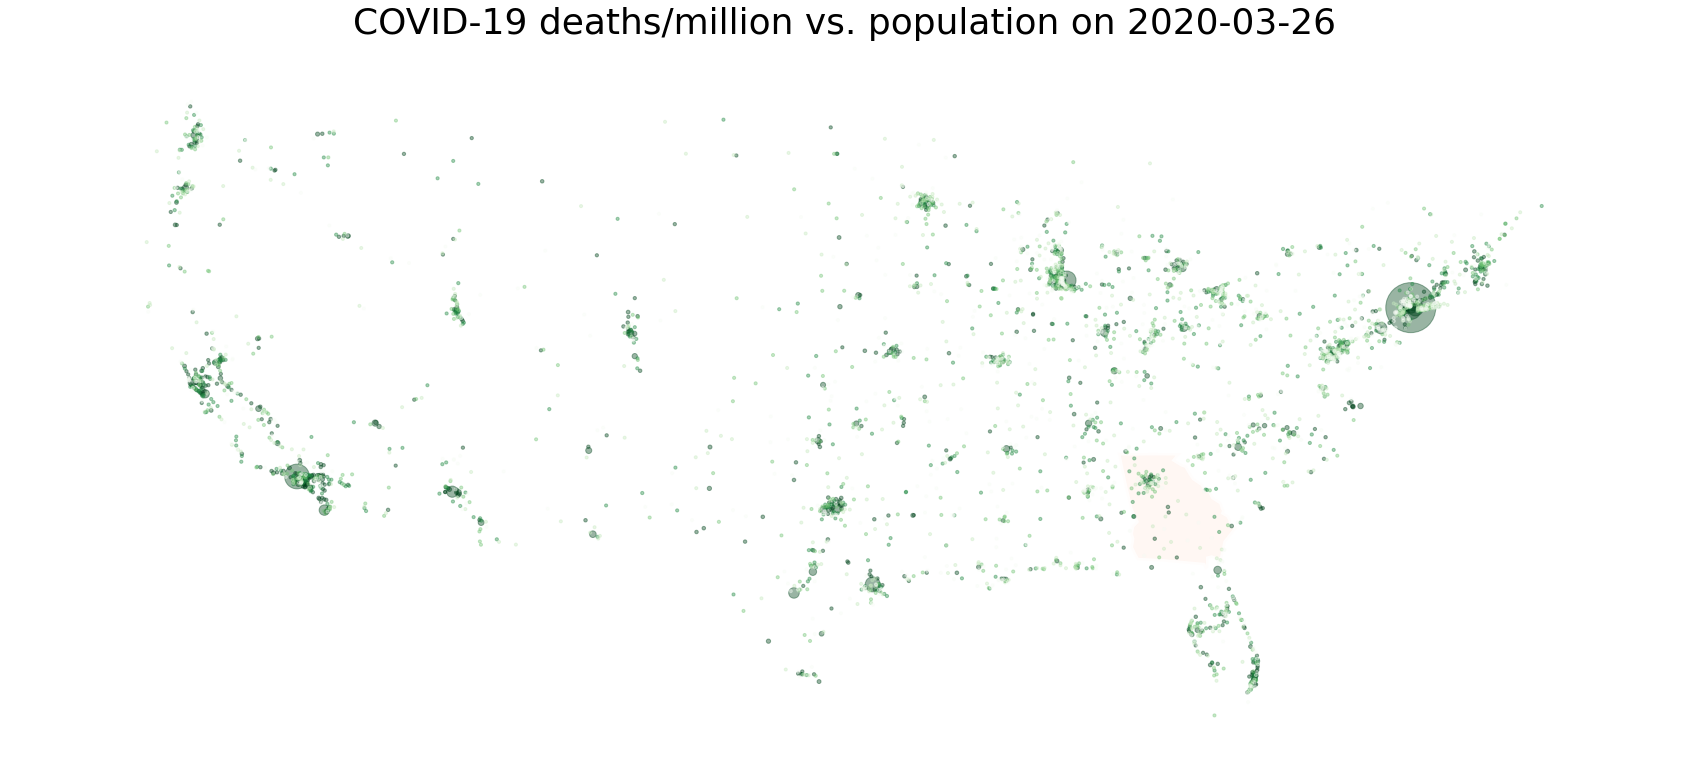

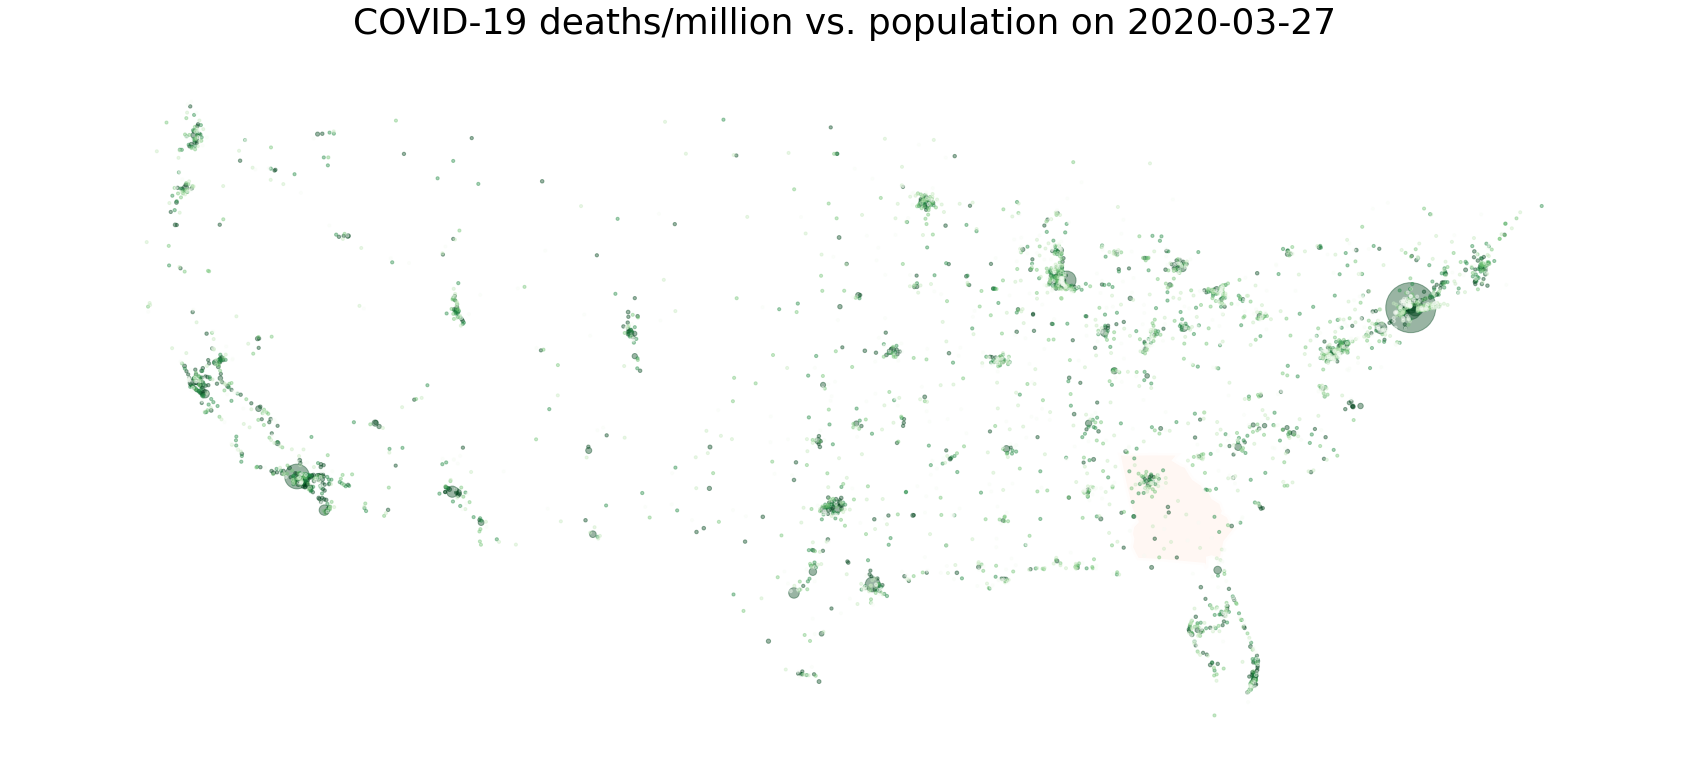

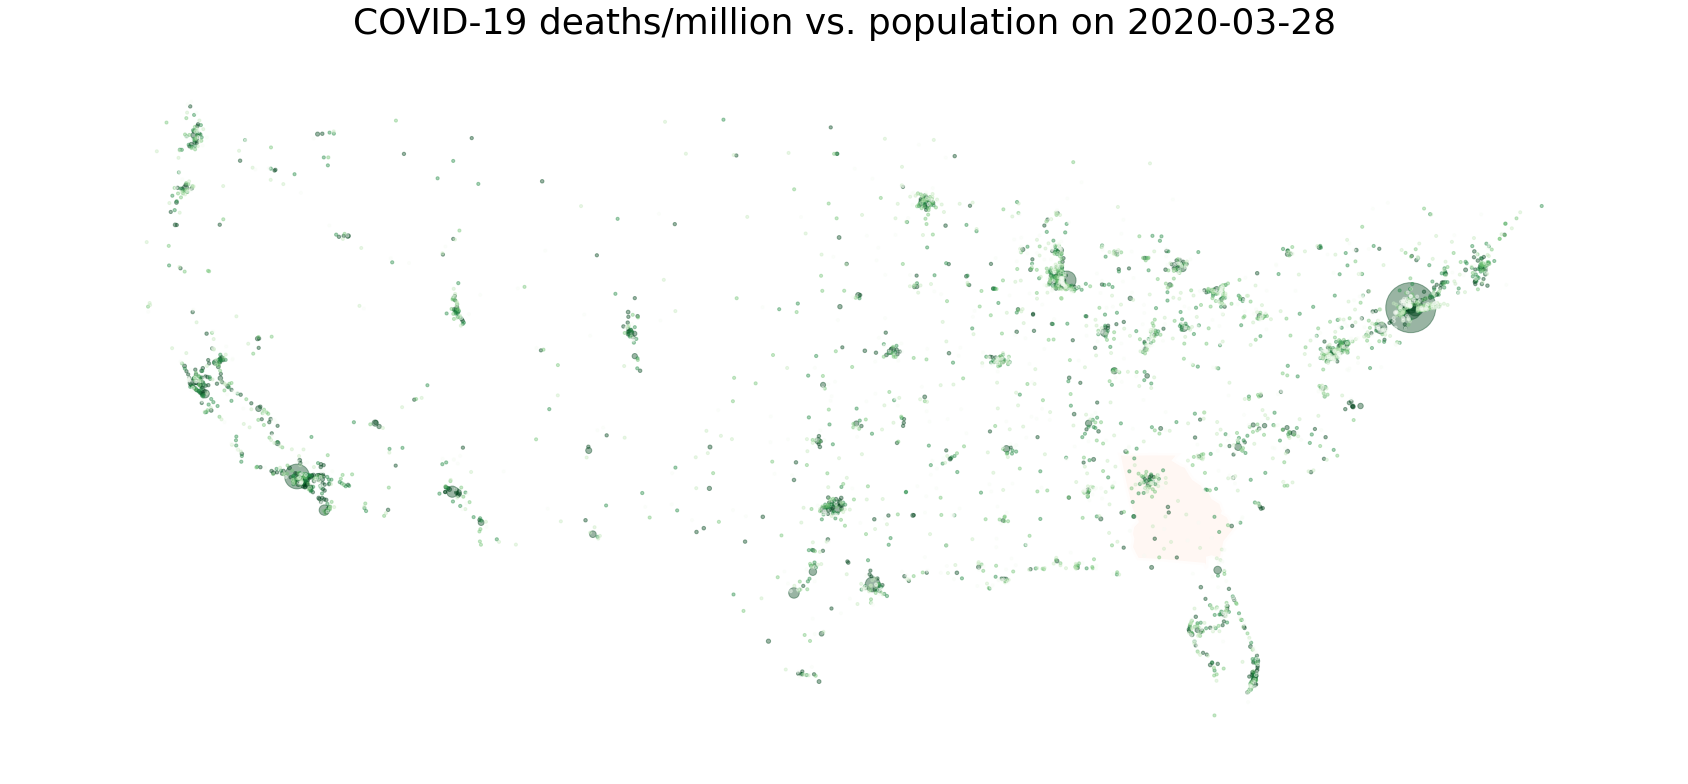

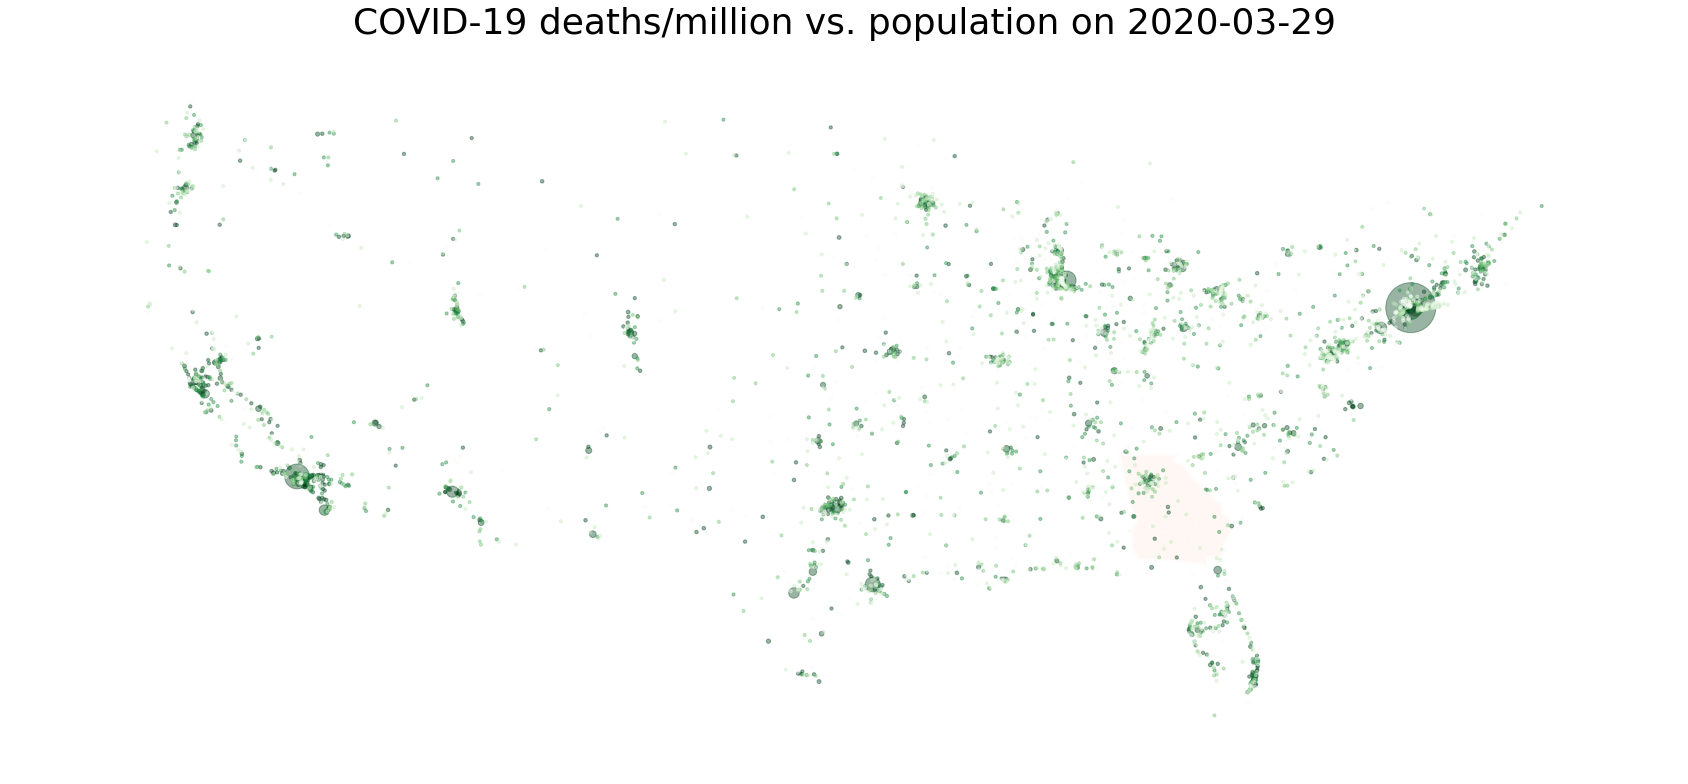

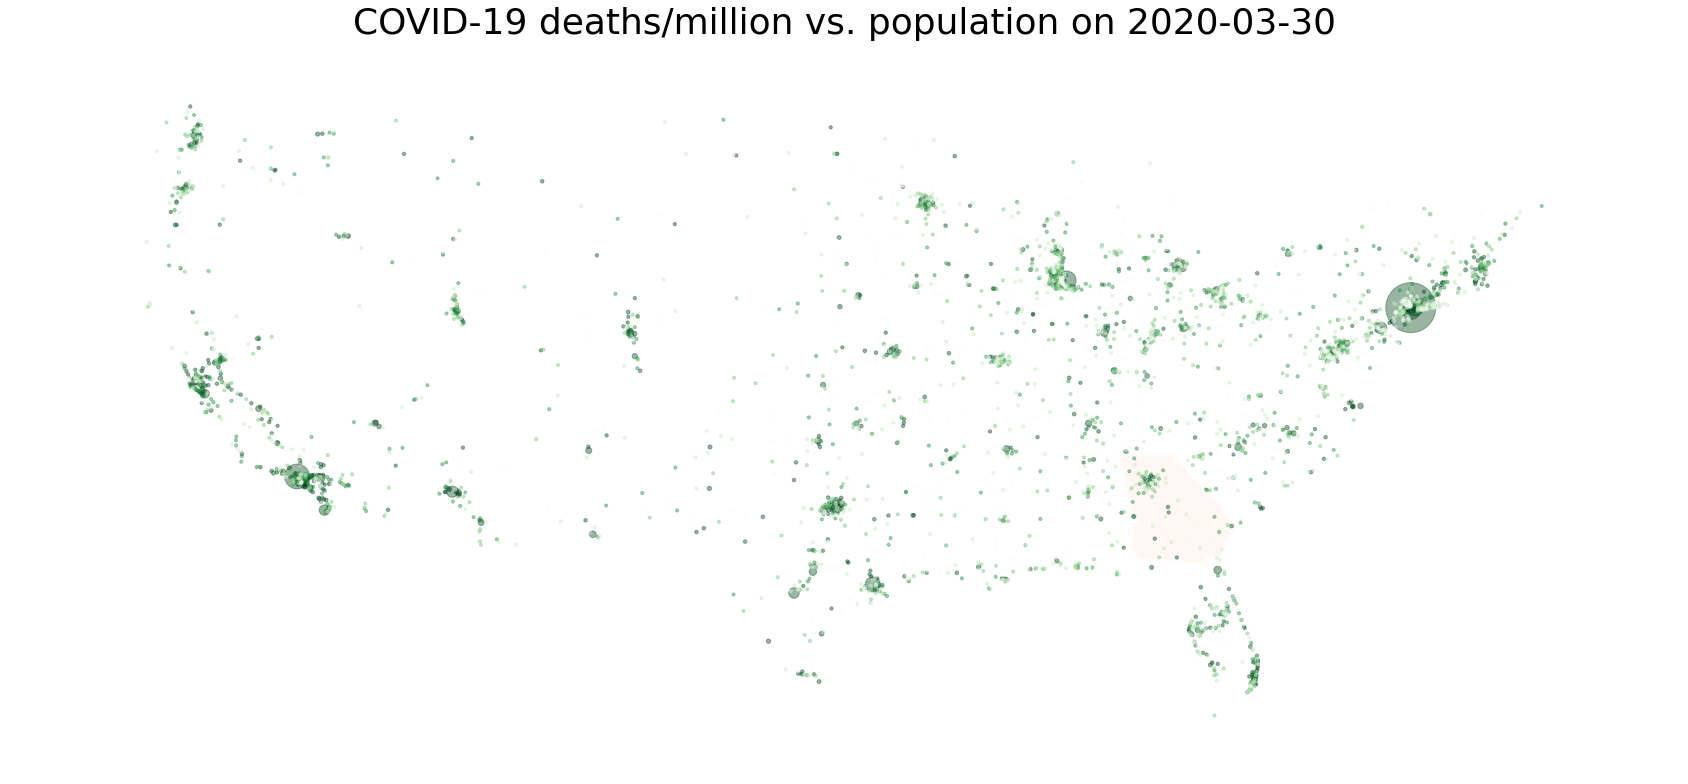

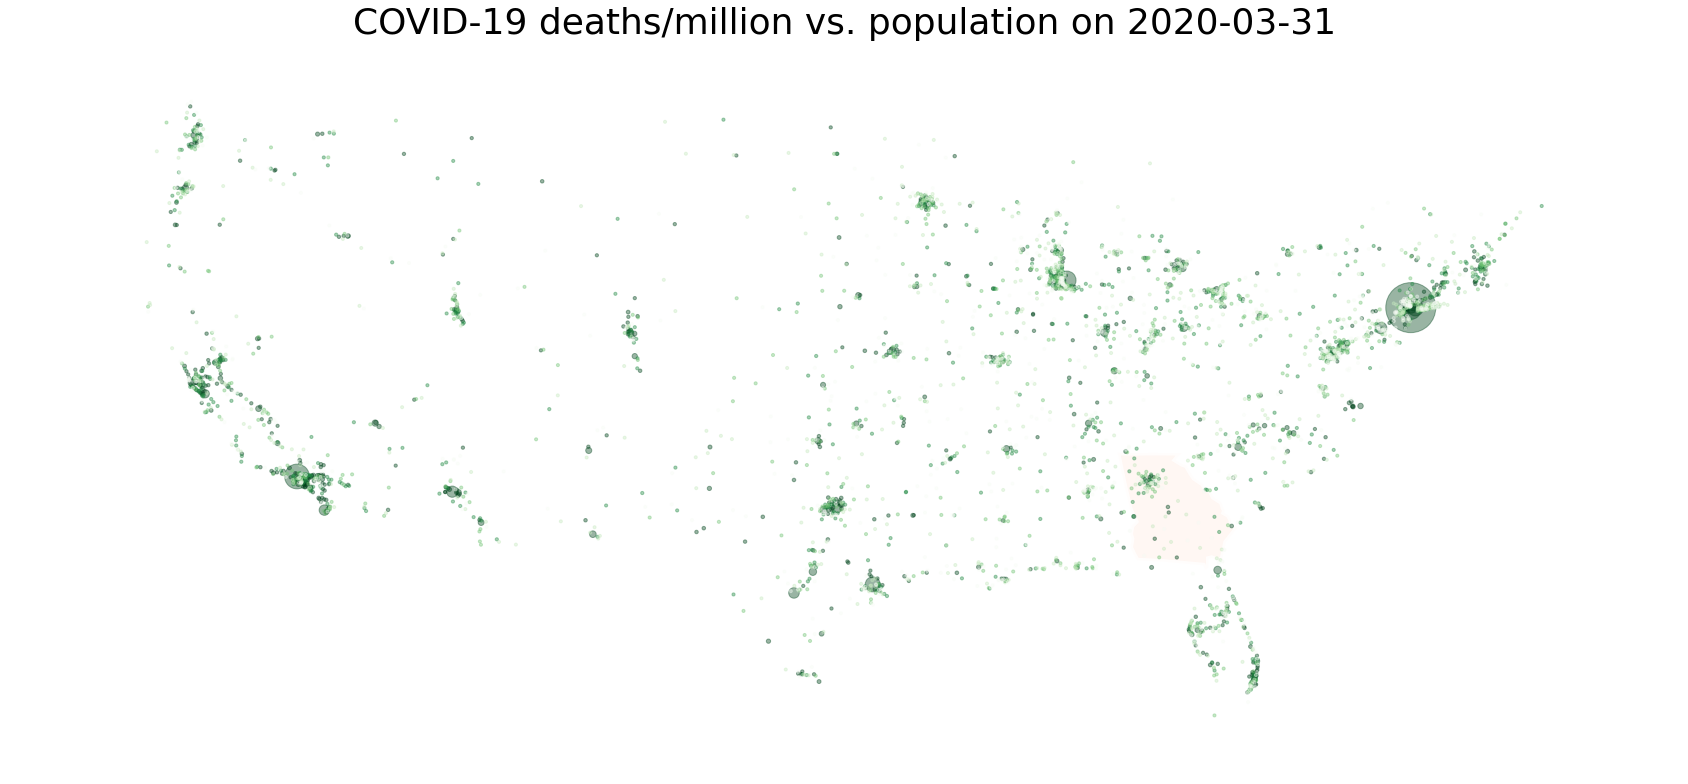

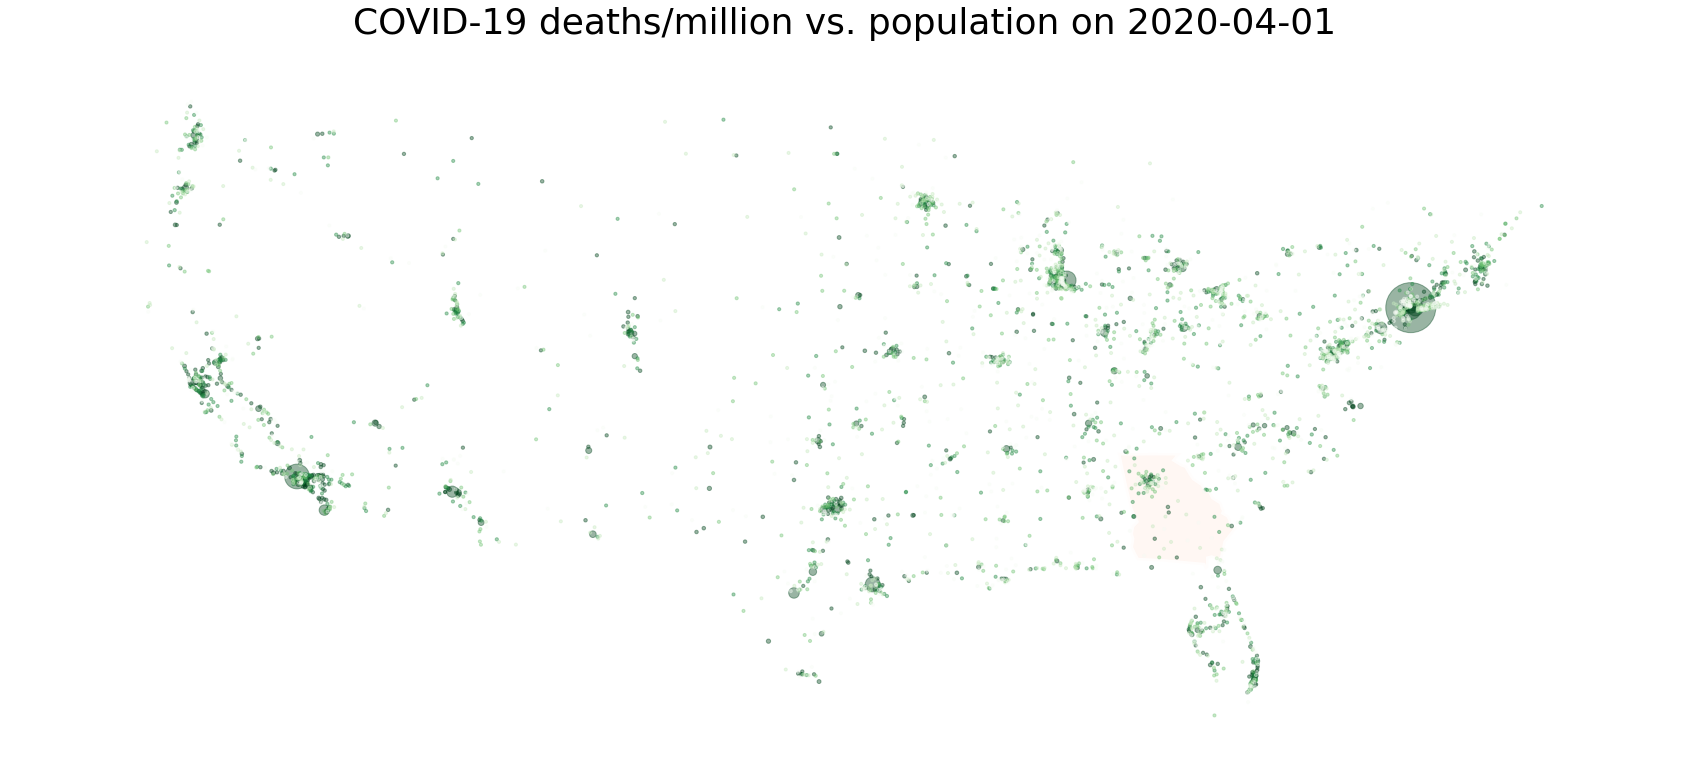

In [53]:
anim_path = pathlib.Path("anim/")
anim_path.mkdir(parents=True, exist_ok=True)

fig = plt.figure()
image_files = []

for date in dates:
    is_earthday = ihme["date"]==date
    cv19 = contiguous_usa.merge(ihme[is_earthday], left_on="state", right_on="location_name")
    
    deaths_per_mil = cv19["deaths_mean"] / cv19["population"] * 1000000.0
    cv19["deaths_per_mil"] = deaths_per_mil

    file_name = plot_choropleth(anim_path, date, cv19, continental_usa_cities)
    image_files.append(file_name)

In [54]:
images = []

for file_name in image_files:
    images.append(imageio.imread(file_name))

gif_path = "movie.gif"
imageio.mimsave(gif_path, images, fps=2)

In [56]:
from IPython.display import HTML

HTML('<img src="movie.gif" />')